<a href="https://colab.research.google.com/github/FaliaAmalia/Tugas_Damin2403/blob/master/TugasDamin_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [80]:
from google.colab import files
uploaded = files.upload()

Saving datadamins.csv to datadamins.csv


In [81]:
data = pd.read_csv('datadamins.csv')
data.head()

,x,y,jarak_1,jarak_2,jarak_3,type
0,9.802,10.132,11.590,8.408,4776,0
1,10.350,9.768,11.212,8.516,8173,0
2,10.098,9.988,11.566,8.024,23423,0
3,9.730,9.910,11.246,8.584,1818,0
4,9.754,10.430,11.252,8.566,14894,3


In [82]:
data_fix = data[['x','y','jarak_1','jarak_2','jarak_3','type']].head(300)
data_fix.head()

,x,y,jarak_1,jarak_2,jarak_3,type
0,9.802,10.132,11.590,8.408,4776,0
1,10.350,9.768,11.212,8.516,8173,0
2,10.098,9.988,11.566,8.024,23423,0
3,9.730,9.910,11.246,8.584,1818,0
4,9.754,10.430,11.252,8.566,14894,3


In [83]:
data_fix['type'].value_counts()

0    153
1     67
2     44
3     36
Name: type, dtype: int64

In [0]:
X = data_fix.drop(['type'], axis=1)

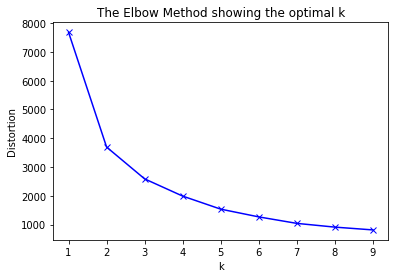

In [109]:
distortions = []
K = range (1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1))/ X.shape[0])

# plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

KeyError: ignored

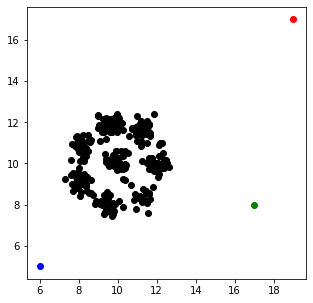

In [106]:
model_kme = KMeans(n_clusters= 2)
model_kme.fit(X)

centroids = {
    i+1: [np.random.randint(0, 30), np.random.randint(0, 30)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 40)
plt.xlim(0, 40)
plt.show()

In [89]:
pred_kme = model_kme.predict(X)
pred_kme

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], d

In [0]:
data_kme = X.copy()

In [0]:
data_kme['cluster'] = pred_kme

In [92]:
data_kme.head(50)

,x,y,jarak_1,jarak_2,jarak_3,cluster
0,9.802,10.132,11.590,8.408,4776,0
1,10.350,9.768,11.212,8.516,8173,0
2,10.098,9.988,11.566,8.024,23423,1
3,9.730,9.910,11.246,8.584,1818,0
4,9.754,10.430,11.252,8.566,14894,0
5,9.836,9.902,10.780,8.294,13128,0
6,10.238,9.866,11.040,8.322,29619,1
7,9.530,9.862,11.198,7.886,2308,0
8,10.154,9.820,11.168,8.262,9606,0
9,9.336,10.456,11.880,8.080,15394,0


In [93]:
data_kme['cluster'].value_counts()

0    158
1    142
Name: cluster, dtype: int64